# Evaluación de riesgos de proveedores

Este notebook analiza los riesgos no financieros asociados a proveedores externos, usando un dataset simulado.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar dataset
df = pd.read_csv('/workspaces/Evaluacn-de-riesgos/data/proveedores.csv')
df.head()

,ID_proveedor,Nombre_proveedor,Tipo_servicio,Riesgo_operativo,Riesgo_tecnologico,Riesgo_legal,Riesgo_ciberseguridad,Incidentes_previos,Cumple_normativas
0,P0001,Proveedor_1,ConsultorÃ­a,4,1,1,4,0,SÃ­
1,P0002,Proveedor_2,Infraestructura TI,2,1,1,3,0,SÃ­
2,P0003,Proveedor_3,Seguridad,4,4,1,3,2,SÃ­
3,P0004,Proveedor_4,Seguridad,4,4,5,1,2,SÃ­
4,P0005,Proveedor_5,Soporte,3,3,1,4,0,SÃ­


# Cálculo de Score Total de Riesgo

In [5]:
df['Score_total'] = df[['Riesgo_operativo', 'Riesgo_tecnologico', 'Riesgo_legal', 'Riesgo_ciberseguridad']].mean(axis=1)
df[['ID_proveedor', 'Nombre_proveedor', 'Score_total']].head()

,ID_proveedor,Nombre_proveedor,Score_total
0,P0001,Proveedor_1,2.50
1,P0002,Proveedor_2,1.75
2,P0003,Proveedor_3,3.00
3,P0004,Proveedor_4,3.50
4,P0005,Proveedor_5,2.75


# Identificación de Proveedores Críticos

In [6]:
criticos = df[(df['Score_total'] > 4) | (df['Cumple_normativas'] == 'No')]
criticos[['ID_proveedor', 'Nombre_proveedor', 'Score_total', 'Cumple_normativas']]

,ID_proveedor,Nombre_proveedor,Score_total,Cumple_normativas
9,P0010,Proveedor_10,3.50,No
11,P0012,Proveedor_12,3.50,No
12,P0013,Proveedor_13,3.75,No
19,P0020,Proveedor_20,4.75,SÃ­
37,P0038,Proveedor_38,3.00,No
...,...,...,...,...
473,P0474,Proveedor_474,3.50,No
478,P0479,Proveedor_479,3.50,No
488,P0489,Proveedor_489,2.25,No
492,P0493,Proveedor_493,2.75,No


Indicadores clave de Riesgo (KRI)

In [7]:
indicadores = {
    'Promedio_riesgo_operativo': df['Riesgo_operativo'].mean(),
    'Promedio_riesgo_tecnologico': df['Riesgo_tecnologico'].mean(),
    'Promedio_riesgo_legal': df['Riesgo_legal'].mean(),
    'Promedio_riesgo_ciberseguridad': df['Riesgo_ciberseguridad'].mean(),
    'Porcentaje_cumplimiento': (df['Cumple_normativas'] == 'Sí').mean() * 100,
    'Total_incidentes': df['Incidentes_previos'].sum()
}
pd.Series(indicadores)

Promedio_riesgo_operativo           2.950
Promedio_riesgo_tecnologico         3.016
Promedio_riesgo_legal               3.060
Promedio_riesgo_ciberseguridad      3.038
Porcentaje_cumplimiento             0.000
Total_incidentes                  541.000
dtype: float64

# Viasualización de Riesgos Promedio por Tipo

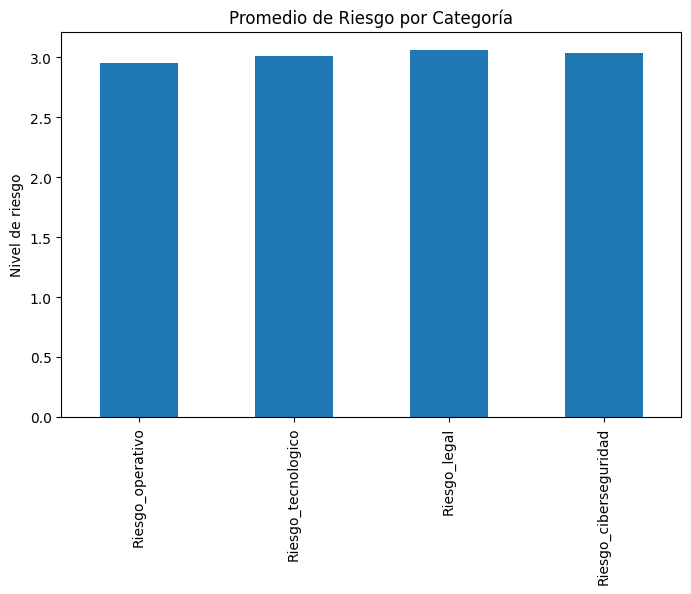

In [8]:
riesgos = df[['Riesgo_operativo', 'Riesgo_tecnologico', 'Riesgo_legal', 'Riesgo_ciberseguridad']].mean()
riesgos.plot(kind='bar', figsize=(8,5), title='Promedio de Riesgo por Categoría')
plt.ylabel('Nivel de riesgo')
plt.show()

# Exportar en Excel

In [4]:
"%pip install openpyxl"

'%pip install openpyxl'

In [11]:
with pd.ExcelWriter('/workspaces/Evaluacn-de-riesgos/reports/reporte_riesgos.xlsx') as writer:
    df.to_excel(writer, sheet_name='Datos_Completos', index=False)
    criticos.to_excel(writer, sheet_name='Proveedores_Criticos', index=False)
    pd.Series(indicadores).to_frame('Valor').to_excel(writer, sheet_name='Indicadores')
print('✅ Reporte exportado exitosamente.')

✅ Reporte exportado exitosamente.
